# Chipotle **


### Step 1. Import the necessary libraries

In [1]:
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests


In [2]:

# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")


### Step 2. Import the dataset of `chipotle` and assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")

In [4]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
chipo_quantity = chipo.loc[:,["item_name","quantity"]]
chipo_quantity

,item_name,quantity
0,Chips and Fresh Tomato Salsa,1
1,Izze,1
2,Nantucket Nectar,1
3,Chips and Tomatillo-Green Chili Salsa,1
4,Chicken Bowl,2
...,...,...
4617,Steak Burrito,1
4618,Steak Burrito,1
4619,Chicken Salad Bowl,1
4620,Chicken Salad Bowl,1


In [7]:
chipo_quantity = chipo_quantity.groupby("item_name").sum().sort_values(by="quantity",ascending=True)
chipo_quantity

,quantity
item_name,
Carnitas Salad,1
Veggie Crispy Tacos,1
Chips and Mild Fresh Tomato Salsa,1
Crispy Tacos,2
Salad,2
Bowl,4
Steak Salad,4
Veggie Salad,6
Carnitas Salad Bowl,6


In [8]:
df = pd.DataFrame(chipo["item_name"].value_counts(ascending=True))[45:]
df

,item_name
Canned Soft Drink,301
Steak Burrito,368
Chips and Guacamole,479
Chicken Burrito,553
Chicken Bowl,726


### Step 4. Create a histogram of the top 5 items bought

Text(0, 0.5, 'Number of Times Ordered')

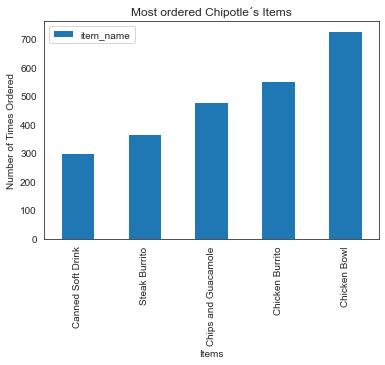

In [9]:
# Este sería el gráfico de las veces que aparece los nombres en el dataset sin tener en cuenta las cantidades
df.plot(kind="bar")
plt.title("Most ordered Chipotle´s Items")
plt.xlabel("Items")
plt.ylabel("Number of Times Ordered")

Text(0, 0.5, 'Number of Times Ordered')

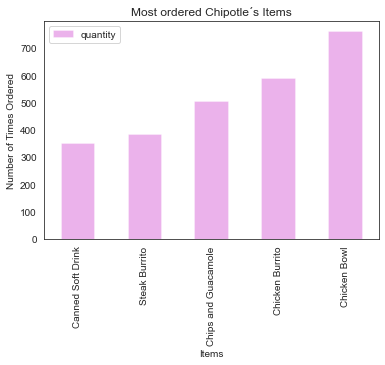

In [10]:
# Este sería el gráfico de las veces que aparece los nombres en el dataset teniendo en cuenta las cantidades

chipo_quantity[45:].plot(kind="bar",color="m",alpha=0.3)
plt.title("Most ordered Chipotle´s Items")
plt.xlabel("Items")
plt.ylabel("Number of Times Ordered")

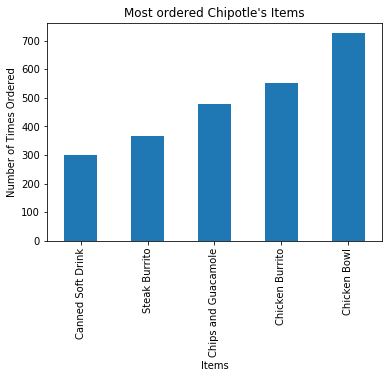

### Step 5. Create a scatterplot with the number of items orderered per order price

Make sure you get the same labels and title
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [11]:
chipo["item_price"] = [float(value[1:-1]) for value in chipo.item_price]


In [12]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [15]:
chipo_n = chipo.groupby("order_id").sum()
chipo_n

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0, 0.5, 'Items ordered')

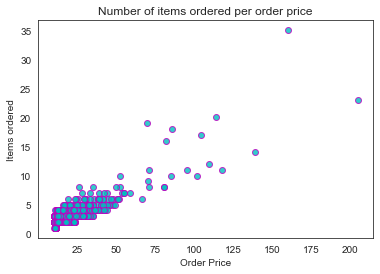

In [28]:
plt.scatter(x=chipo_n["item_price"],y=chipo_n["quantity"],c="c", alpha=0.8, edgecolors="m")
plt.title("Number of items ordered per order price")
plt.xlabel("Order Price")
plt.ylabel("Items ordered")

(0, 36.7178857951459)

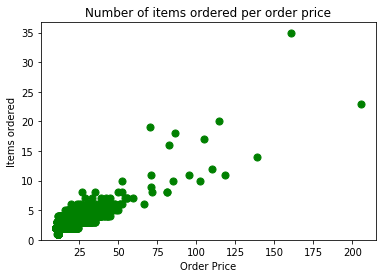